# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Novrian Pratama
- **Email:** novrianprtama2@gmail.com
- **ID Dicoding:** novrian_pratama2

## Menentukan Pertanyaan Bisnis

1. Bagaimana Perilaku Pembelian Pelanggan Berdasarkan Lokasi Geografis?
2. Produk Apa yang Paling Laris dan Bagaimana Tren Penjualannya dari Waktu ke Waktu?
3. Bagaimana Kepuasan Pelanggan Terkait dengan Waktu Pengiriman?


## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [3]:
# Function for read csv dataset
def gath_data(file_path):
    df = pd.read_csv(file_path)
    return df

In [4]:
# Dataset Customers 
customer_df = gath_data(r'D:\File Belajar\Belajar Data\Machine Learning\DBS Course\E-Commerce Public Dataset\customers_dataset.csv')
customer_df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


**Insight Dataset Customers:**
- Total terdapat 5 kolom pada dataset customers
- Terdapat 2 kolom yang dapat menjadi primary key yaitu customer_id dan customer_unique_id
- customer_zip_code_prefix menunjukkan kode pos pelanggan, yang bisa digunakan untuk analisis wilayah tertentu.
- customer_city dan customer_state bisa digunakan untuk melihat distribusi geografis pelanggan.

In [5]:
# Dataset Geolocation 
geolocation_df = gath_data(r'D:\File Belajar\Belajar Data\Machine Learning\DBS Course\E-Commerce Public Dataset\geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight Dataset Geolocation:**
- geolocation_zip_code_prefix = Kode pos pelanggan, digunakan untuk mengelompokkan pelanggan berdasarkan wilayah geografis.
- geolocation_lat = Koordinat garis lintang lokasi, berguna untuk analisis spasial dan pemetaan pelanggan.
- geolocation_lng = Koordinat garis bujur lokasi, melengkapi informasi lokasi bersama dengan garis lintang.
- geolocation_city = Nama kota pelanggan, dapat digunakan untuk segmentasi pasar dan analisis distribusi pelanggan.
- geolocation_state = Kode negara bagian (misalnya SP untuk São Paulo), membantu dalam analisis tren regional dan perencanaan bisnis.

In [6]:
# Dataset Order Items
order_items_df = gath_data(r'D:\File Belajar\Belajar Data\Machine Learning\DBS Course\E-Commerce Public Dataset\order_items_dataset.csv')
order_items_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


**Insight Dataset Order Items:**
- order_id = ID unik untuk setiap pesanan, digunakan untuk menghubungkan data dengan tabel lain seperti pelanggan atau pembayaran.
- order_item_id = Nomor urut item dalam pesanan, menunjukkan jumlah item yang dipesan dalam satu transaksi.
- product_id = ID unik untuk setiap produk, berguna untuk analisis produk yang paling sering dibeli.
- seller_id = ID unik penjual, memungkinkan identifikasi dan analisis kinerja setiap penjual.
- shipping_limit_date = Batas waktu pengiriman, membantu dalam evaluasi kepatuhan logistik terhadap tenggat waktu pengiriman.
- price = Harga produk yang dibeli, digunakan untuk analisis penjualan dan pendapatan.
- freight_value = Biaya pengiriman, memungkinkan analisis biaya logistik dan dampaknya terhadap harga total.

In [7]:
# Dataset Order Payments
order_payments_df = gath_data(r'D:\File Belajar\Belajar Data\Machine Learning\DBS Course\E-Commerce Public Dataset\order_payments_dataset.csv')
order_payments_df.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


**Insight Dataset Order Payments:**
- order_id = ID unik untuk setiap pesanan, menghubungkan informasi pembayaran dengan detail pesanan lainnya.
- payment_sequential = Urutan pembayaran dalam pesanan, berguna untuk analisis jika ada beberapa pembayaran dalam satu pesanan.
- payment_type = Metode pembayaran yang digunakan, penting untuk memahami preferensi pembayaran pelanggan.
- payment_installments = Jumlah cicilan yang dipilih pelanggan saat membayar, berguna untuk analisis perilaku pembelian berdasarkan metode pembayaran.
- payment_value = Jumlah total pembayaran yang dilakukan untuk pesanan, dapat digunakan untuk analisis pendapatan dan pola transaksi.

In [8]:
# Dataset Reviews
order_reviews_df = gath_data(r'D:\File Belajar\Belajar Data\Machine Learning\DBS Course\E-Commerce Public Dataset\order_reviews_dataset.csv')
order_reviews_df.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


**Insight Dataset Reviews:**
- review_id = ID unik untuk setiap ulasan pelanggan, digunakan untuk mengidentifikasi setiap review secara individual.
- order_id = ID pesanan yang terkait dengan ulasan, memungkinkan analisis hubungan antara transaksi dan pengalaman pelanggan.
- review_score = Skor ulasan yang diberikan pelanggan (biasanya dari 1-5), berguna untuk analisis kepuasan pelanggan.
- review_comment_title = Judul singkat dari ulasan pelanggan, memberikan gambaran cepat tentang opini pelanggan.
- review_comment_message = Pesan ulasan pelanggan yang lebih rinci, dapat digunakan untuk analisis sentimen.
- review_creation_date = Tanggal saat ulasan dibuat oleh pelanggan, membantu dalam memahami tren umpan balik dari waktu ke waktu.
- review_answer_timestamp = Waktu ketika ulasan dijawab oleh penjual atau sistem, berguna untuk mengukur responsivitas terhadap feedback pelanggan.

In [9]:
# Dataset Orders
orders_df = gath_data(r'D:\File Belajar\Belajar Data\Machine Learning\DBS Course\E-Commerce Public Dataset\orders_dataset.csv')
orders_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


**Insight Dataset Orders:**
- order_id = ID unik untuk setiap pesanan, digunakan untuk mengidentifikasi transaksi individu.
- customer_id = ID pelanggan yang melakukan pesanan, memungkinkan analisis perilaku pelanggan.
order_status = Status pesanan, berguna untuk tracking dan analisis performa penjualan.
- order_purchase_timestamp = Waktu ketika pesanan dibuat, membantu dalam analisis tren pembelian.
- order_approved_at = Waktu ketika pembayaran pesanan disetujui, bisa digunakan untuk mengukur efisiensi proses pembayaran.
- order_delivered_carrier_date = Waktu ketika pesanan dikirim oleh kurir, berguna untuk analisis waktu pengiriman.
- order_delivered_customer_date = Waktu ketika pesanan diterima pelanggan, dapat digunakan untuk menghitung waktu pengiriman aktual.
- order_estimated_delivery_date = Perkiraan tanggal pengiriman, bisa dibandingkan dengan tanggal pengiriman aktual untuk mengukur akurasi estimasi.

In [10]:
# Dataset Product Categroy Name Translate
product_category_df = gath_data(r'D:\File Belajar\Belajar Data\Machine Learning\DBS Course\E-Commerce Public Dataset\product_category_name_translation.csv')
product_category_df.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


**Insight Dataset Product Categroy Name Translate:**
- product_category_name = Nama kategori produk dalam bahasa asli, berguna untuk analisis produk dalam konteks lokal.
- product_category_name_english = Terjemahan nama kategori produk ke dalam bahasa Inggris, membantu dalam analisis lintas bahasa dan pasar internasional.

In [11]:
# Dataset Products
products_df = gath_data(r'D:\File Belajar\Belajar Data\Machine Learning\DBS Course\E-Commerce Public Dataset\products_dataset.csv')
products_df.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


**Insight Dataset Products:**
- product_id = Identifikasi unik setiap produk dalam dataset.
- product_category_name = Kategori produk dalam bahasa asli.
- product_name_length = Panjang nama produk dalam jumlah karakter, menunjukkan seberapa panjang deskripsi nama produk.
- product_description_length = Panjang deskripsi produk dalam jumlah karakter, menggambarkan seberapa detail informasi produk.
- product_photos_qty = Jumlah foto produk yang tersedia, memengaruhi daya tarik visual produk bagi pelanggan.
- product_weight_g = Berat produk dalam gram, berguna untuk logistik dan perhitungan ongkos kirim.
- product_length_cm = Panjang produk dalam cm, informasi penting untuk pengemasan dan pengiriman.
- product_height_cm = Tinggi produk dalam cm, membantu dalam menentukan ukuran kemasan.
- product_width_cm = Lebar produk dalam cm, digunakan untuk perhitungan volume dan penyimpanan.

In [12]:
# Dataset Sellers
sellers_df = gath_data(r'D:\File Belajar\Belajar Data\Machine Learning\DBS Course\E-Commerce Public Dataset\sellers_dataset.csv')
sellers_df.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


**Insight Dataset Sellers:**
- seller_id = Identifikasi unik setiap penjual dalam dataset.
- seller_zip_code_prefix = Kode pos penjual, berguna untuk analisis lokasi dan logistik pengiriman.
- seller_city = Kota tempat penjual berada, membantu dalam memahami distribusi geografis penjual.
- seller_state = Negara bagian tempat penjual berada, berguna untuk analisis pasar berdasarkan wilayah administratif.

### Assessing Data

Customer Dataset

In [13]:
# Customer dataset
customer_df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [14]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Informasi:
- Terdapat 5 buah kolom, 4 kolom bertipe object kecuali kolom customer_zip_code prefix bertipe int64
- Tidak terdapat missing value

In [15]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Informasi:
- nilai maksimal dari zip code prefix yaitu 99990 dan nilai minimum 1003

Geolocation Dataset

In [16]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [17]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Informasi:
- Tidak terdapat missing value pada setiap kolom
- Tipe data sudah sesuai terdapat tipe data float, int, dan object

In [18]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Informasi:
- Nilai pada code prefix pada rentang 1.0 - 9.9
- Nilai geo lat dan geo lng terdapat value negatif dan positif.
- ketiga kolom tersebut memiliki nilai dibelakang koma yang besar.

Order Items Dataset

In [19]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [20]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


informasi:
- kolom shipping limit date memiliki type data yang salah seharusnya bertipe datetime
- tidak terdapat missing value 

In [21]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


informasi:
- nilai order_item_id memiliki value paling banyak yaitu 1 dan nilai maksimum 21
- Value price tertinggi yaitu 6735 dengan price minimum yaitu 0.85
- nilai kolom freight_value memiliki nilai minimum 0 dengan rata-rata 19.9


Order Payments Dataset

In [22]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [23]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Informasi:
- Tidak terdapat missing value
- Tipe data sudah sesuai dengan tampilan dataframe

In [24]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


informasi:
- Nilai rata-rata payment sequential yaitu 1.09 dengan nilai maksimum 29
- kolom payment memiliki rentang nilai 0 - 24 dan nilai rata-rata 2.85
- Kolom payment value memiliki rentang nilai 0 - 13664 dengan nilai rata-rata 154

Order Reviews Dataset

In [25]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [26]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Informasi:
- terdapat banyak missing value pada kolom review_comment_title dan review_comment_message
- kolom review_creation_date dan review_answer_timestamp memiliki tipe data yang salah seharusnya datatime

In [27]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Informasi:
- Value pada review score dimulai dari 1 - 5
- nilai rata-rata yaitu 4

Orders Dataset

In [28]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [29]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Informasi:
- Terdapat missing value pada beberapa kolom
- selain kolom order id, customer id, dan order statu, memiliki tipe data yang salah. seharusnya bertipe data datatime 

In [30]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


informasi:
- pada kolom order_status variabel delivery memiliki value tertinggi diantara yang lain
- total value yang seharusnya yaitu 99441, terdapat beberapa fitur yang tidak memiliki total yang sama menandakan ada missing value pada fitur tersebut
- pada kolom order purchases timestamp terdapat variabel 2018-04-11 10:48:14 yang memiliki jumlah terbanyak menandakan banyak customer membeli pada tanggal dan waktu tersebut
- order approved = terdapat variabel 2018-02-27 04:31:10 yang memiliki jumlah terbanyak menandakan order disetejui seller pada bulan februari 
- order delivery carrier = terdapat variabel 2018-05-09 15:48:00 yang memiliki jumlah terbanyak menandakan order product dibawa ke pengiriman pada bulan 5 tanggal 9.
- order delivered customer = terdapat variabel 2018-05-08 23:38:46 yang memiliki jumlah terbanyak menandakan orderan diantar kerumah customer pada tanggal dan bulan yang sama ketika barang diambil oleh pengiriman
- order delivered customer = terdapat variabel 2017-12-20 00:00:00 yang memiliki jumlah terbanyak menandakan orderan tiba dirumah customer diakhir tahun 2017 

Product Category Dataset

In [31]:
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [32]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Informasi:
- Tidak terdapat missing value dan total value yaitu 71

In [33]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


informasi:
- produk terbanyak yaitu beleza_saude atau dalam arti english yaitu health_beauty

Products Dataset

In [34]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [35]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Informasi:
- Terdapat missing value pada beberapa kolom
- datatype tiap fitur sudah sesuai

In [36]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Informasi:
- product_name_lenght	: Rata-rata 48 karakter, sebagian besar ≤ 57 karakter. Nama yang terlalu pendek mungkin kurang informatif.
- product_description_lenght: Sangat bervariasi (4 - 3992 karakter). Beberapa produk memiliki deskripsi sangat pendek, yang bisa mengurangi pemahaman pelanggan.
- product_photos_qty: Rata-rata 2 foto, tetapi 50% hanya memiliki 1 foto, yang bisa mengurangi daya tarik pelanggan.
- product_weight_g: Sangat bervariasi (0 - 40,425 gram). Data berat 0 gram kemungkinan error dan perlu diperiksa.
- product_length_cm: Rata-rata 30,8 cm, dengan sebagian besar produk tidak lebih dari 40 cm.
- product_height_cm: Rata-rata 16,9 cm, tetapi ada variasi besar, dengan beberapa produk setinggi 105 cm.
- product_width_cm: Rata-rata 23,2 cm, dengan lebar maksimum mencapai 118 cm, menunjukkan keberagaman ukuran produk.

Sellers Dataset

In [37]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [38]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


informasi:
- tidak terdapat missing value pada kolom
- tipe data sudah sesuai

In [39]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


informasi:
- Jumlah Seller: Dataset mencakup 3,095 seller dengan kode pos.
- Rata-rata Kode Pos: 32,291, tetapi sangat bervariasi dengan standar deviasi yang besar (32,713).
- Kode Pos Minimum & Maksimum: Rentang kode pos sangat luas, dari 1,001 hingga 99,730, menunjukkan bahwa seller berasal dari berbagai wilayah.

### Cleaning Data

1. Customer Dataset

In [40]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [41]:
# Cek Missing value
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

- Tidak terdapat missing value

In [42]:
# Cek data duplicate
customer_df.duplicated().sum()

0

2. Geolocation Dataset

In [43]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [44]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [45]:
geolocation_df.duplicated().sum()

261831

- Terdapat 261.831 data duplicated dari total 1 juta recrod data
- Langkah terbaik yaitu melakukan drop duplicated

In [46]:
# Drop data duplicated
geolocation_df.drop_duplicates(inplace=True)
geolocation_df.duplicated().sum()

0

3. Order Items Dataset

In [47]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [48]:
# mengubah tipe data menjadi datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [49]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [50]:
order_items_df.duplicated().sum()

0

4. Order Payments Dataset

In [51]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [52]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [53]:
order_payments_df.duplicated().sum()

0

5. Order Reviews Dataset

In [54]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [55]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [56]:
# Mengubah tipe data menjadi datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [57]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [58]:
# Cek missing value untuk fitur reviews comment title
order_reviews_df[order_reviews_df['review_comment_title'].isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [59]:
order_reviews_df['review_comment_title'].value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [60]:
# Cek missing value untuk fitur reviews comment message
order_reviews_df[order_reviews_df['review_comment_message'].isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


In [61]:
order_reviews_df['review_comment_message'].value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

In [62]:
# Mengatasi missing value pada fitur Reviews comment title dan review commect message

order_reviews_df['review_comment_title'].fillna(order_reviews_df['review_comment_title'].mode()[0], inplace=True)
order_reviews_df['review_comment_message'].fillna(order_reviews_df['review_comment_message'].mode()[0], inplace=True)

order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [63]:
order_reviews_df['review_comment_title'].value_counts()

review_comment_title
Recomendo                    88079
recomendo                      345
Bom                            293
super recomendo                270
Excelente                      248
                             ...  
Luminaria sobrepor led 18        1
Não recebi.                      1
produto com lacre violado        1
Atraso Entrega                   1
Foto enganosa                    1
Name: count, Length: 4527, dtype: int64

- Data missing value diisi oleh variabel yang sering muncul yaitu Recomendo

In [64]:
# Cek jumlah value setelah handling missing value
order_reviews_df['review_comment_message'].value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              58477
Bom                                                                                                                                                                                                      189
muito bom                                                                                                                                                                                                122
bom                                                                                                                                                                                                      107
Recomendo                                                                                                                                                    

- Data missing value diisi oleh variabel yang paling banyak muncul yaitu Muito bom

In [65]:
order_reviews_df.duplicated().sum()

0

6. Orders Dataset

In [66]:
orders_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [67]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [68]:
# Mengubah tipe data object menjadi datetime

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [69]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

- Jumlah missing value data 5% dari total data
- langkah terbaiki adalah mengisi dengan nilai rata-rata

In [70]:
# Mengatasi missing value dengan nilai rata-rata tiap fitur value

orders_df['order_approved_at'].fillna(orders_df['order_approved_at'].median(), inplace=True)
orders_df['order_delivered_carrier_date'].fillna(orders_df['order_delivered_carrier_date'].median(), inplace=True)
orders_df['order_delivered_customer_date'].fillna(orders_df['order_delivered_customer_date'].median(), inplace=True)

orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [71]:
orders_df.duplicated().sum()

0

7. Product Category Dataset

In [72]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [73]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [74]:
product_category_df.duplicated().sum()

0

8. Products Dataset

In [75]:
products_df.tail(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


In [76]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [77]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [78]:
# Menampilkan semua missing value 
miss_value_products = products_df[products_df.isna().any(axis=1)]
miss_value_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [79]:
# mengatasi missing value

# Handling missing value tipe data categorical
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)

# Handling missing value tipe data numerical
num_col_product = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in num_col_product:
    mean_num = products_df[col].mean()
    products_df[col].fillna(mean_num, inplace=True)
    
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [80]:
products_df.duplicated().sum()

0

9. Sellers Dataset

In [81]:
sellers_df.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [82]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [83]:
# Cek missing value
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [84]:
# Cek duplicated value
sellers_df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

### 2.1 Explore Customer Dataset

In [85]:
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
18013,f8392feb1839b8ecbe9c9c2553ef2849,7101512429309e75acf4faaee55e5af0,89253,jaragua do sul,SC
81789,9b0921ec304b8c9ed01d2992cebacc8b,96070e4ed2e1b29611b06c697340c839,1540,sao paulo,SP
50149,0e8b055d3ccba0579aec511d1077dab3,fdef92427c2c3a9449eca2d6667d44d7,55560,barreiros,PE
59434,ab5f573d973c8dae4ac038e1a7fb4fc0,e701d84fe7c4c701d09b208176a0ef25,17760,inubia paulista,SP
69523,b268519093dfee306454fc430c872568,e75909e6a7b6c6e811d50257a0ad64d7,18025,sorocaba,SP


In [86]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**
- Dataset memiliki 99.441 entri pelanggan, tetapi hanya 96.096 customer unique ID. Ini menunjukkan bahwa ada pelanggan yang melakukan lebih dari satu transaksi.
- Kota dengan jumlah pelanggan terbanyak adalah Sao Paulo, dengan 15.540 pelanggan.
- Dataset mencakup pelanggan dari 27 negara bagian di Brasil, dengan jumlah tertinggi berasal dari SP (São Paulo), yang memiliki 41.746 pelanggan.
- Ada satu customer unique ID yang muncul sebanyak 17 kali, menunjukkan adanya pelanggan yang cukup aktif berbelanja berulang kali.

In [87]:
customer_df.groupby(by='customer_state').agg({
    'customer_id': 'nunique',
}).sort_values(by='customer_id', ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Insight:

- São Paulo (SP) memiliki jumlah pelanggan tertinggi, yaitu 41.746 pelanggan, jauh lebih banyak dibandingkan negara bagian lainnya.
- Negara bagian di wilayah utara Brasil, seperti Roraima (RR) dengan 46 pelanggan dan Amapá (AP) dengan 68 pelanggan, memiliki jumlah pelanggan yang jauh lebih sedikit.
- Ada kesenjangan besar antara jumlah pelanggan di negara bagian terbesar (SP) dan negara bagian dengan jumlah pelanggan lebih sedikit (RR, AP, AC).

### 2.2 Explore Customer & Geolocation

In [88]:
# Merge customers dengan geolocation
customer_geolocation_df = pd.merge(
    customer_df, geolocation_df,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)

customer_geolocation_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.515413,-47.398194,franca,SP


In [89]:
customer_geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10327728 entries, 0 to 10327727
Data columns (total 10 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   customer_id                  object 
 1   customer_unique_id           object 
 2   customer_zip_code_prefix     int64  
 3   customer_city                object 
 4   customer_state               object 
 5   geolocation_zip_code_prefix  int64  
 6   geolocation_lat              float64
 7   geolocation_lng              float64
 8   geolocation_city             object 
 9   geolocation_state            object 
dtypes: float64(2), int64(2), object(6)
memory usage: 787.9+ MB


In [90]:
customer_geolocation_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,10327728,10327728,1.032773e+07,10327728,10327728,1.032773e+07,1.032773e+07,1.032773e+07,10327728,10327728
unique,99163,95828,NaN,4074,27,NaN,NaN,NaN,5812,27
top,70d98c841b3004427e66e41bd2ace052,31d332d20895c5c0baefe55207a0fead,NaN,rio de janeiro,SP,NaN,NaN,NaN,rio de janeiro,SP
freq,779,2181,NaN,940474,3878927,NaN,NaN,NaN,940421,3878907
mean,NaN,NaN,3.428840e+04,NaN,NaN,3.428840e+04,-2.181000e+01,-4.612746e+01,NaN,NaN
std,NaN,NaN,2.741530e+04,NaN,NaN,2.741530e+04,4.464366e+00,3.644221e+00,NaN,NaN
min,NaN,NaN,1.003000e+03,NaN,NaN,1.003000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,NaN,NaN,1.329000e+04,NaN,NaN,1.329000e+04,-2.357275e+01,-4.797750e+01,NaN,NaN
50%,NaN,NaN,2.625500e+04,NaN,NaN,2.625500e+04,-2.288202e+01,-4.651987e+01,NaN,NaN
75%,NaN,NaN,3.874000e+04,NaN,NaN,3.874000e+04,-2.026162e+01,-4.346700e+01,NaN,NaN


Insight:

- Data menunjukkan bahwa pelanggan berasal dari 4.074 kota yang berbeda di seluruh Brasil, dengan jumlah pelanggan terbanyak di Rio de Janeiro.
- Latitude memiliki rentang dari -36.60 hingga 45.07, menunjukkan bahwa pelanggan tersebar dari ujung selatan hingga utara Brasil.
- Longitude berkisar dari -101.47 hingga 13.82, mencerminkan cakupan wilayah yang sangat luas, termasuk area pesisir dan pedalaman.

In [91]:
# Analisis data geolocation berdasarkan kota dan negara bagian 
customer_geolocation_df.groupby(by=['geolocation_city','geolocation_state']).customer_id.nunique().sort_values(ascending=False)

geolocation_city        geolocation_state
sao paulo               SP                   15586
são paulo               SP                   15406
rio de janeiro          RJ                    6923
belo horizonte          MG                    2789
brasilia                DF                    1951
                                             ...  
fortaleza dos valos     RS                       1
fortim                  CE                       1
sao geraldo do baguari  MG                       1
sao geraldo da piedade  MG                       1
óleo                    SP                       1
Name: customer_id, Length: 6055, dtype: int64

Insight:

- Terdapat perbedaan penulisan untuk kota yang sama ("sao paulo" vs. "são paulo"), yang bisa menyebabkan kesalahan dalam analisis.
- São Paulo muncul dua kali dengan ejaan berbeda ("sao paulo" dan "são paulo"), masing-masing memiliki 15.586 dan 15.406 pelanggan. Jika digabungkan, total pelanggan dari kota ini mencapai 30.992, menjadikannya pasar terbesar dalam dataset ini.

### 2.3 Explore Orders & Order Items

In [92]:
orders_items = pd.merge(
    left= orders_df,
    right= order_items_df,
    how='left',
    left_on = 'order_id',
    right_on = 'order_id',   
)

orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [93]:
# Total Pesanan per Status Order
orders_items.groupby(by='order_status').order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

Insight:

- Dari total pesanan, 96.478 pesanan memiliki status delivered (terkirim), menunjukkan bahwa sebagian besar transaksi dalam berhasil diselesaikan.
- Sebanyak 1.107 pesanan berstatus shipped (dikirim tetapi belum diterima pelanggan).
- Hanya 625 pesanan yang berstatus canceled (dibatalkan). Ini mengindikasikan bahwa tingkat pembatalan relatif rendah dibandingkan total pesanan yang diproses.
- Sebanyak 609 pesanan memiliki status unavailable, yang bisa berarti produk tidak tersedia atau ada masalah dengan stok barang. Jika jumlah ini tinggi, mungkin perlu ada perbaikan dalam manajemen inventaris.

In [94]:
# Rata-rata Waktu Pengiriman per Status Order
orders_items['delivery_time'] = (orders_df['order_delivered_carrier_date'] - orders_df['order_purchase_timestamp']).dt.days
orders_items.groupby(by='order_status').delivery_time.mean().round(1).reset_index()

,order_status,delivery_time
0,approved,1.0
1,canceled,4.4
2,created,2.4
3,delivered,4.4
4,invoiced,5.9
5,processing,4.6
6,shipped,3.7
7,unavailable,5.0


Insight:

- Pesanan dengan status approved memiliki rata-rata waktu pengiriman hanya 1 hari
- pesanan dengan status canceled memiliki rata-rata waktu 4,4 hari, yang mungkin mencerminkan waktu tunggu sebelum pembatalan dikonfirmasi
- Pesanan yang sampai ke pelanggan memiliki rata-rata waktu pengiriman 4,4 hari
- Pesanan berstatus shipped memiliki waktu rata-rata 3,7 hari, lebih cepat dari pesanan delivered

In [95]:
# Total Pendapatan per Seller
orders_items.groupby(by='seller_id').price.sum().reset_index().sort_values(by='price', ascending=False)

,seller_id,price
857,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1013,53243585a1d6dc2643021fd1853d8905,222776.05
881,4a3ca9315b744ce9f8e9374361493884,200472.92
3024,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
1535,7c67e1448b00f6e969d365cea6b010ab,187923.89
...,...,...
627,34aefe746cd81b7f3b23253ea28bef39,8.00
1370,702835e4b785b67a084280efca355756,7.60
373,1fa2d3def6adfa70e58c276bb64fe5bb,6.90
1465,77128dec4bec4878c37ab7d6169d6f26,6.50


In [96]:
# Rata-rata Biaya Pengiriman per Kategori Seller
orders_items.groupby(by='seller_id').freight_value.mean().reset_index().sort_values(by='freight_value', ascending=False)

,seller_id,freight_value
1362,6fa9202c10491e472dffd59a3e82b2a3,308.336667
2436,c88f62b4c386a59281014d677864d016,251.500000
2881,ee27a8f15b1dded4d213a468ba4eb391,227.660000
1583,80ceebb4ee9b31afb6c6a916a574a1e2,193.210000
1059,56e361f411e38dcef17cdc2a3d99628b,185.776000
...,...,...
2826,e9e446d01bd10a97a8ffcfc4a3a20cb2,7.390000
2909,f0ec6a2adb05c62655a26dd347b8dede,7.390000
2444,c97aa4ee7420f937da13b7f9e2228b99,6.660000
2984,f664f98bfda2eaf266a23ff144e7a872,3.905000


Insight:

- Biaya pengiriman bervariasi secara drastis, dengan seller yang memiliki biaya tertinggi mencapai 308,33, sementara seller dengan biaya terendah hanya 1,20. 
- Seller dengan ID 6fa9202c10491e472dffd59a3e82b2a3 memiliki biaya pengiriman rata-rata 308,33, jauh lebih tinggi dibandingkan seller lainnya. Hal ini bisa disebabkan oleh lokasi geografis mereka yang jauh dari pusat distribusi atau produk yang membutuhkan metode pengiriman khusus.
- Seller yang memiliki rata-rata biaya pengiriman rendah (di bawah 10) kemungkinan besar beroperasi di daerah yang dekat dengan pusat distribusi utama atau memiliki kerja sama dengan layanan logistik untuk menekan biaya pengiriman.

### 2.4 Explore Order Payment

In [97]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
13890,d76365196bbcbd01da5825472503cf32,1,credit_card,4,46.01
4086,e842dc26adcaa67fb96f4e32c2cf97cc,1,credit_card,6,72.73
84617,0f96e9894259aa8c07c655cabec46c2c,1,credit_card,2,28.85
12653,484ce4bf2067023e5184d003c41eb07a,1,boleto,1,74.44
17842,11b1da117d12c1e9ebd9f86f6e5cb4ae,1,credit_card,3,66.78


In [98]:
# Total Pembayaran per Metode Pembayaran
order_payments_df.groupby(by='payment_type').payment_value.sum().reset_index().sort_values(by='payment_value', ascending=False)

,payment_type,payment_value
1,credit_card,12542084.19
0,boleto,2869361.27
4,voucher,379436.87
2,debit_card,217989.79
3,not_defined,0.00


- Metode pembayaran credit card menjadi puncak dan banyak digunakan oleh customer. dengan jumlah pembayar mencapai 12542084.19 dollar
- terdapat metode debit card yang masih sedikit penggunaan untuk transaksi

In [99]:
# Rata-rata Jumlah Cicilan per Metode Pembayaran
order_payments_df.groupby(by='payment_type').payment_installments.mean().round(1).reset_index()

,payment_type,payment_installments
0,boleto,1.0
1,credit_card,3.5
2,debit_card,1.0
3,not_defined,1.0
4,voucher,1.0


- Rata-rata penggunaan cicilan dilakukan menggunakan credit_card. jumlah angka payment installments menunjukkan seberapa besar potensi cicilan yang dilakukan oleh customer.

In [100]:
# Jumlah Transaksi per Metode Pembayaran
order_payments_df.groupby(by='payment_type').order_id.nunique().reset_index().sort_values(by='order_id', ascending=False)

,payment_type,order_id
1,credit_card,76505
0,boleto,19784
4,voucher,3866
2,debit_card,1528
3,not_defined,3


- Orderan product paling banyak menggunakan credit card untuk pembayaran.
- sementara metode pembayaran yang tidak terdeteksi terdapat 3 value.

### 2.5 Explore Order Reviews

In [101]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
98870,68b1b8994b7057957569d418cbf46445,44ddda99ffdd779ef6dddc13ed804971,4,Recomendo,Muito bom,2017-08-23,2017-09-30 01:08:46
26386,e2a5d5699dd1f8f17b893cd11499d205,c5ddf6be2ae50588b29222f7b1fd84aa,5,RELÓGIO BOM,"CHEGOU ANTES DO PRAZO, FACIL DE CONFIGURAR E E...",2018-08-26,2018-08-27 22:16:33
51031,5f43f81ad4edb57b8796aa67aa43c702,99a01ac9c1c718ea6eac9fac178552cc,5,Bom produto,Muito bom,2018-06-02,2018-06-03 02:26:01
23188,781a01b8bad00d442623263197400927,c313f7a184ca89fe98049253bd4a3806,1,Recomendo,Muito bom,2018-08-23,2018-08-23 05:01:57
57240,3dfd5026e93d9b368c84f6df8e97e2f2,55489c304b912adb3b5cf8b444a70df5,5,Recomendo,Muito bom,2017-08-26,2017-08-27 01:29:23


In [102]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [103]:
# Rata-rata Skor Review per Tanggal
order_reviews_df.groupby(by='review_creation_date').review_score.mean().round(1).reset_index().sort_values(by='review_score', ascending=False)

,review_creation_date,review_score
395,2018-01-02,5.0
51,2016-12-29,5.0
121,2017-03-27,5.0
437,2018-02-13,5.0
107,2017-03-13,5.0
...,...,...
47,2016-12-11,1.0
32,2016-11-20,1.0
50,2016-12-25,1.0
2,2016-10-09,1.0


- Beberapa tanggal memiliki skor rata-rata sempurna (5.0), sementara yang lain memiliki skor terendah (1.0)
- Beberapa tanggal di tahun 2016 memiliki rata-rata skor 1.0

In [104]:
# Distribusi Jumlah Review per Skor
order_reviews_df.groupby(by='review_score').review_id.nunique().reset_index().sort_values(by='review_id', ascending=False)

,review_score,review_id
4,5,56910
3,4,19007
0,1,11282
2,3,8097
1,2,3114


- Sebanyak 56.910 review diberikan dengan skor 5, 19.007 review memiliki skor 4, yang berarti banyak pelanggan merasa puas meskipun ada sedikit kekurangan.
- 11.282 review mendapatkan skor 1, menunjukkan bahwa ada sejumlah besar pelanggan yang mengalami pengalaman buruk, kemungkinan karena keterlambatan pengiriman atau kualitas produk yang buruk.

In [105]:
# Waktu Rata-rata Merchant dalam Menjawab Review
order_reviews_df['response_time'] = (order_reviews_df['review_answer_timestamp'] - order_reviews_df['review_creation_date']).dt.days

order_reviews_df.groupby(by='review_score').response_time.mean().round(1).reset_index()

,review_score,response_time
0,1,2.5
1,2,2.4
2,3,2.4
3,4,2.6
4,5,2.6


- Waktu rata-rata merchant dalam menjawab review berkisar antara 2.4 hingga 2.6 hari
- Baik ulasan positif (5) maupun negatif (1) mendapat respons dalam waktu yang hampir sama (2.5 – 2.6 hari)

In [106]:
# Persentase Review Positif vs Negatif
positive_reviews = order_reviews_df[order_reviews_df["review_score"] >= 4]["review_id"].count()
negative_reviews = order_reviews_df[order_reviews_df["review_score"] <= 2]["review_id"].count()
total_reviews = order_reviews_df["review_id"].count()

positive_percentage = round((positive_reviews / total_reviews) * 100, 1)
negative_percentage = round((negative_reviews / total_reviews) * 100, 1)

print(f"Review Positif: {positive_percentage}%")
print(f"Review Negatif: {negative_percentage}%")

Review Positif: 77.1%
Review Negatif: 14.7%


- Sebanyak 77.1% dari total review memiliki skor 4 atau 5, menunjukkan bahwa sebagian besar pelanggan puas dengan pengalaman belanja mereka.
- Hanya 14.7% review yang memiliki skor 1 atau 2, yang menunjukkan bahwa ada sebagian kecil pelanggan yang mengalami masalah dalam pembelian mereka.

### 2.6 Explore Product Category & Product

In [107]:
category_products = pd.merge(
    left=products_df,
    right=product_category_df,
    how='left',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)

category_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [108]:
# Top 10 Jumlah category product yang terjual
category_products.groupby(by='product_category_name_english').product_id.nunique().reset_index().sort_values(by='product_id', ascending=False).head(10)

,product_category_name_english,product_id
7,bed_bath_table,3639
65,sports_leisure,2867
39,furniture_decor,2657
43,health_beauty,2444
49,housewares,2335
5,auto,1900
15,computers_accessories,1639
69,toys,1411
70,watches_gifts,1329
68,telephony,1134


- Kategori "Bed, Bath & Table" (3639 produk) dan "Housewares" (2335 produk) menunjukkan bahwa konsumen banyak membeli produk untuk kebutuhan rumah tangga dan dekorasi.
- "Sports & Leisure" (2867 produk) masuk dalam kategori teratas, menandakan tingginya permintaan untuk produk olahraga dan rekreasi.
- "Toys" (1411 produk) dan "Watches & Gifts" (1329 produk) mengindikasikan tingginya permintaan untuk produk anak-anak dan hadiah.

In [109]:
# Rata-rata Berat Produk per Kategori
category_products.groupby(by='product_category_name_english').product_weight_g.mean().round(1).reset_index().sort_values(by='product_weight_g', ascending=False)

,product_category_name_english,product_weight_g
41,furniture_mattress_and_upholstery,13190.0
57,office_furniture,12740.9
51,kitchen_dining_laundry_garden_furniture,11598.6
38,furniture_bedroom,9997.2
45,home_appliances_2,9913.3
...,...,...
67,tablets_printing_image,381.4
33,fashion_underwear_beach,362.3
32,fashion_sport,344.7
29,fashion_childrens_clothes,324.0


- "Furniture Mattress and Upholstery" memiliki rata-rata berat 13.1 kg, diikuti oleh "Office Furniture" (12.7 kg) dan "Kitchen & Garden Furniture" (11.6 kg). Ini menunjukkan bahwa kategori furnitur memiliki bobot yang jauh lebih tinggi dibanding kategori lain.
- Kategori "Fashion Children's Clothes" (324 g), "Fashion Sport" (344.7 g), dan "Fashion Underwear & Beachwear" (362.3 g) termasuk yang paling ringan, mencerminkan bobot pakaian dan aksesori yang lebih kecil.

In [110]:
# Rata-rata Panjang, Lebar, dan Tinggi Produk per Kategori
avg_dimension = category_products.groupby(by='product_category_name_english').agg({
    'product_length_cm': 'mean',
    'product_height_cm': 'mean',
    'product_width_cm': 'mean'
}).round(2)
avg_dimension

,product_length_cm,product_height_cm,product_width_cm
product_category_name_english,,,
agro_industry_and_commerce,36.53,28.95,25.81
air_conditioning,36.47,23.89,26.09
art,35.93,11.80,23.36
arts_and_craftmanship,28.37,9.79,21.05
audio,20.83,11.50,17.34
...,...,...,...
stationery,29.06,19.59,23.35
tablets_printing_image,28.11,9.44,21.56
telephony,18.43,6.85,13.25


- "Agro Industry and Commerce" memiliki dimensi terbesar (36.53 cm x 28.95 cm x 25.81 cm), mencerminkan produk industri atau pertanian.
- "Arts and Craftmanship" memiliki tinggi terendah (9.79 cm), menunjukkan bentuk produk yang cenderung datar.
- "Toys" dan "Stationery" memiliki dimensi lebih besar, mencerminkan ukuran produk yang memerlukan lebih banyak ruang penyimpanan.
- Produk besar lebih mahal dalam penyimpanan & pengiriman, sedangkan produk kecil lebih efisien secara logistik.

### 2.7 Explore Sellers & Order Items

In [111]:
sellers_items = pd.merge(
    left =sellers_df,
    right =order_items_df,
    how='left',
    left_on= 'seller_id',
    right_on= 'seller_id',
)

sellers_items.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [112]:
# Total Pendapatan per Seller
sellers_items.groupby(by='seller_id').price.sum().reset_index().sort_values(by='price', ascending=False).head(10)

,seller_id,price
857,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1013,53243585a1d6dc2643021fd1853d8905,222776.05
881,4a3ca9315b744ce9f8e9374361493884,200472.92
3024,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
1535,7c67e1448b00f6e969d365cea6b010ab,187923.89
1560,7e93a43ef30c4f03f38b393420bc753a,176431.87
2643,da8622b14eb17ae2831f4ac5b9dab84a,160236.57
1505,7a67c85e85bb2ce8582c35f2203ad736,141745.53
192,1025f0e2d44d7041d6cf58b6550e0bfa,138968.55
1824,955fee9216a65b617aa5c0531780ce60,135171.70


- Seller 4869f7a5dfa277a7dca6462dcf3b52b2 memiliki pendapatan tertinggi 229.472,63, menunjukkan volume penjualan tinggi atau produk bernilai tinggi.
- Perbedaan pendapatan antar seller teratas cukup tipis, dengan seller kedua hanya 6.696,58 lebih rendah dari yang pertama.
- Jika sebagian besar transaksi didominasi seller tertentu, bisa ada ketimpangan pasar dan persaingan yang tidak merata.

In [113]:
# Jumlah Produk yang Dijual per Seller
sellers_items.groupby(by='seller_id').product_id.nunique().reset_index().sort_values(by='product_id', ascending=False).head(10)

,seller_id,product_id
881,4a3ca9315b744ce9f8e9374361493884,399
2485,cca3071e3e9bb7d12640c9fbe2301306,322
2617,d91fb3b7d041e83b64a00a3edfb37e4f,315
3024,fa1c13f2614d7b5c4749cbc52fecda94,289
1391,7142540dd4c91e2237acb7e911c4eba2,266
1235,6560211a19b47992c3666cc44a7e94c0,256
2643,da8622b14eb17ae2831f4ac5b9dab84a,222
2836,ea8482cd71df3c1969d7b9473ff13abc,220
731,3d871de0142ce09b7081e2b9d1733cb1,202
1535,7c67e1448b00f6e969d365cea6b010ab,198


- Seller 4a3ca9315b744ce9f8e9374361493884 memiliki 399 produk, menandakan diversifikasi produk tinggi.
- Tidak selalu seller dengan produk terbanyak menghasilkan pendapatan tertinggi, menandakan pentingnya strategi harga dan pemasaran.

In [114]:
# Rata-rata Harga Produk per Kota Seller
sell_product_city = sellers_items.groupby(by='seller_city').agg({
    'price':['sum','mean','max','min']
})

sell_product_city.head()

price                            
                    sum        mean     max     min
seller_city                                        
04482255         399.90  399.900000  399.90  399.90
abadia de goias  142.47  142.470000  142.47  142.47
afonso claudio   293.99   48.998333   99.00   18.90
aguas claras df   35.00   35.000000   35.00   35.00
alambari         138.60   27.720000   29.90   19.00

### 2.8 Explore Customer & Orders

In [115]:
orders_customer = pd.merge(
    left=customer_df,
    right=orders_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

orders_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [116]:
# Jumlah pesanan per kota pelanggan
orders_customer.groupby(by="customer_city").size().reset_index(name="count").sort_values(by='count', ascending=False).head()

,customer_city,count
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521


In [117]:
# Rata-rata keterlambatan pengiriman 
orders_customer["delay"] = (orders_customer["order_delivered_customer_date"] - orders_customer["order_estimated_delivery_date"]).dt.days
orders_customer.groupby("customer_city")["delay"].mean().round(2).reset_index(name="avg_delay_days").head()

,customer_city,avg_delay_days
0,abadia dos dourados,-17.00
1,abadiania,-16.00
2,abaete,-13.58
3,abaetetuba,-9.55
4,abaiara,2.50


In [118]:
# Jumlah pesanan per bulan
orders_customer["order_month"] = orders_customer["order_purchase_timestamp"].dt.to_period("M")
order_per_month = orders_customer.groupby("order_month").size().reset_index(name="count")
print("Jumlah pesanan per bulan:\n", order_per_month.sort_values(by="order_month"))

Jumlah pesanan per bulan:
    order_month  count
0      2016-09      4
1      2016-10    324
2      2016-12      1
3      2017-01    800
4      2017-02   1780
5      2017-03   2682
6      2017-04   2404
7      2017-05   3700
8      2017-06   3245
9      2017-07   4026
10     2017-08   4331
11     2017-09   4285
12     2017-10   4631
13     2017-11   7544
14     2017-12   5673
15     2018-01   7269
16     2018-02   6728
17     2018-03   7211
18     2018-04   6939
19     2018-05   6873
20     2018-06   6167
21     2018-07   6292
22     2018-08   6512
23     2018-09     16
24     2018-10      4


### Merge all dataset

In [119]:
order_product = pd.merge(
    left=products_df,
    right=orders_items,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

order_product_reviews = pd.merge(
    left=order_product,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

all_data = pd.merge(
    left=customer_df,
    right=order_product_reviews,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

# Simpan dataset gabungan ke file CSV 
all_data.to_csv('all_dataset.csv', index=False)


In [159]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114089 entries, 0 to 114088
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    114089 non-null  object        
 1   customer_unique_id             114089 non-null  object        
 2   customer_zip_code_prefix       114089 non-null  int64         
 3   customer_city                  114089 non-null  object        
 4   customer_state                 114089 non-null  object        
 5   product_id                     113314 non-null  object        
 6   product_category_name          113314 non-null  object        
 7   product_name_lenght            113314 non-null  float64       
 8   product_description_lenght     113314 non-null  float64       
 9   product_photos_qty             113314 non-null  float64       
 10  product_weight_g               113314 non-null  float64       
 11  

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana Perilaku Pembelian Pelanggan Berdasarkan Lokasi Geografis?

In [120]:
geolocation_cust = pd.merge(
    left=customer_geolocation_df,
    right=orders_items,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

pd.set_option('display.max_columns', 50)
geolocation_cust.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,NaN
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.497396,-47.399241,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,NaN
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.510459,-47.399553,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,NaN


In [121]:
# Hitung total pendapatan per lokasi
revenue_by_location = geolocation_cust.groupby('geolocation_city')['price'].sum().reset_index().sort_values(by='price', ascending=False).head(10)
revenue_by_location

,geolocation_city,price
4305,rio de janeiro,1.346369e+08
4870,sao paulo,7.409424e+07
606,belo horizonte,5.991067e+07
3392,niteroi,2.234812e+07
1536,curitiba,2.184742e+07
5246,são paulo,1.956695e+07
4038,porto alegre,1.953555e+07
4684,santos,1.824648e+07
5545,uberlandia,1.657556e+07
948,campinas,1.636425e+07


Insight:

- Rio de Janeiro memiliki total pendapatan tertinggi (~134,6 juta) diikuti oleh São Paulo (~74,1 juta), menandakan kedua kota ini sebagai pusat aktivitas e-commerce terbesar.
- Kota-kota besar seperti Belo Horizonte (59,9 juta), Curitiba (21,8 juta), dan Porto Alegre (19,5 juta) memiliki transaksi tinggi, didukung oleh infrastruktur logistik yang baik dan daya beli pelanggan yang kuat.
- Kota seperti Uberlândia (16,5 juta) dan Campinas (16,3 juta) juga memiliki kontribusi signifikan terhadap total pendapatan. Ini menunjukkan adanya peluang pertumbuhan e-commerce di luar kota metropolitan utama.

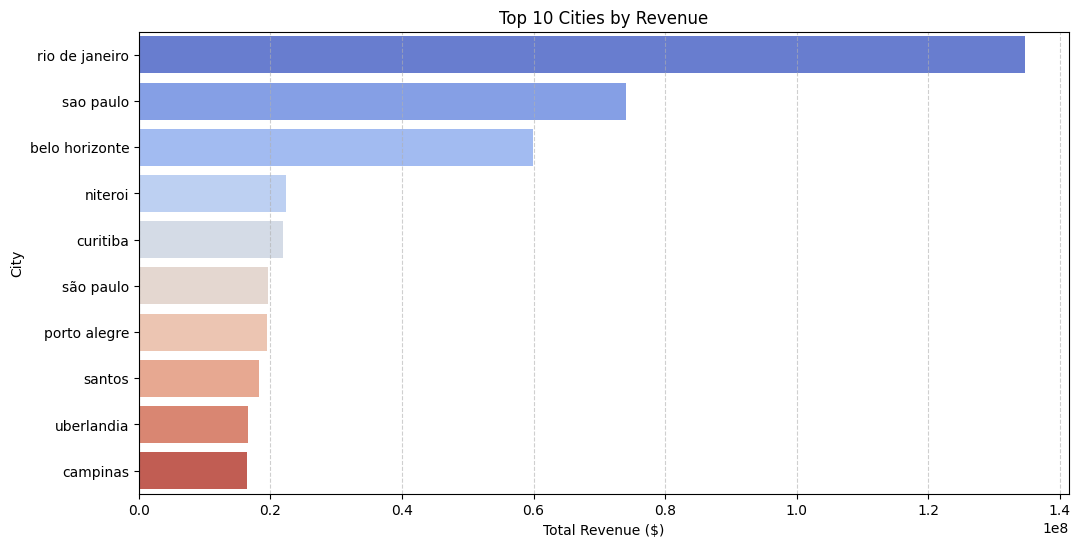

In [122]:
# Visualisasi menggunakan Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_location, x='price', y='geolocation_city', palette='coolwarm')
plt.xlabel('Total Revenue ($)')
plt.ylabel('City')
plt.title('Top 10 Cities by Revenue')
plt.grid(axis='x', linestyle='--', alpha=0.6)

Insight:

- Visualisasi menunjukkan kota rio de janeiro dan sao paulo memiliki total revenue tertinggi diantara yang lain
- Kota dengan revenue terendah terdapat pada campinas dan uberlandian

In [123]:
revenue_by_state = geolocation_cust.groupby('geolocation_state')['price'].sum().reset_index().sort_values(by='price', ascending=False).head(10)
revenue_by_state

,geolocation_state,price
25,SP,4.902573e+08
10,MG,3.072074e+08
18,RJ,2.360373e+08
22,RS,8.215400e+07
17,PR,6.147252e+07
23,SC,5.762480e+07
4,BA,4.373791e+07
7,ES,2.759807e+07
12,MT,1.715637e+07
8,GO,1.492006e+07


Insight:

- Negara bagian São Paulo (SP) mencatat total pendapatan tertinggi 490,3 juta, menunjukkan bahwa ini adalah pusat utama aktivitas e-commerce di Brasil.
- Minas Gerais (MG) dan Rio de Janeiro (RJ) masing-masing memiliki total pendapatan 307,2 juta dan 236 juta, menegaskan daya beli tinggi di kedua wilayah ini.
- Negara bagian Rio Grande do Sul (RS) - 82,1 juta, Paraná (PR) - 61,5 juta, dan Santa Catarina (SC) - 57,6 juta menunjukkan bahwa wilayah selatan memiliki kontribusi signifikan dalam e-commerce.
- Bahia (BA) - 43,7 juta, Espírito Santo (ES) - 27,6 juta, dan Mato Grosso (MT) - 17,1 juta menunjukkan adanya permintaan yang stabil, meskipun lebih rendah dibandingkan wilayah lain.

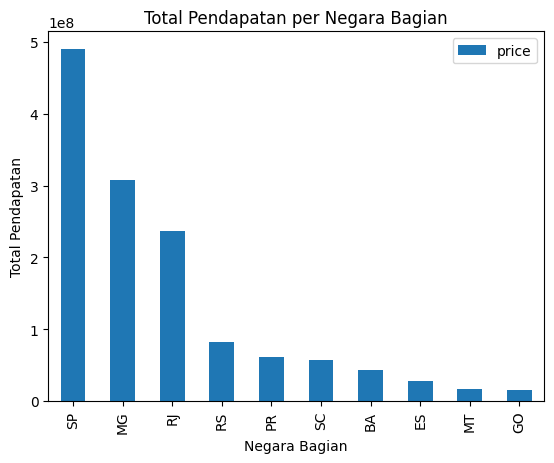

In [124]:
revenue_by_state.plot(kind='bar', x='geolocation_state', y='price', title='Total Pendapatan per Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Total Pendapatan')
plt.show()

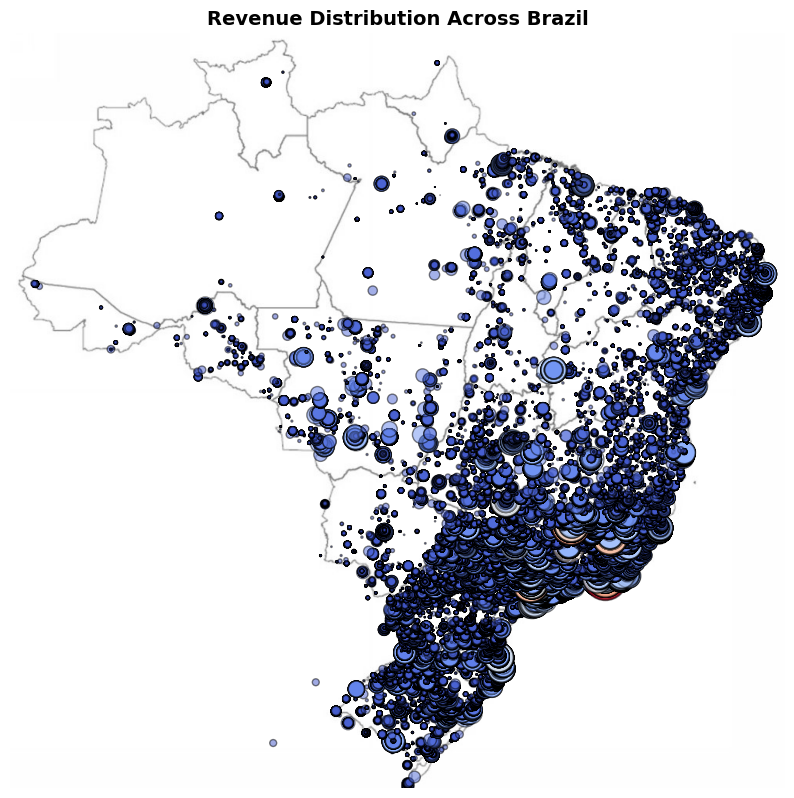

In [125]:
def plot_brazil_map(data):
    # Load gambar peta Brasil
    url = 'https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'
    brazil_map = mpimg.imread(urllib.request.urlopen(url), 'jpg')

    # Buat plot scatter berdasarkan lokasi geografis
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(
        data["geolocation_lng"], 
        data["geolocation_lat"], 
        alpha=0.5, 
        s=data["price"] / 50,  # Ukuran titik berdasarkan revenue
        c=data["price"], 
        cmap='coolwarm', 
        edgecolors='black'
    )

    # Menampilkan peta sebagai latar belakang
    plt.imshow(brazil_map, extent=[-73.98283055, -33.8, -33.75116944, 5.4], alpha=0.6)
    
    # Matikan sumbu
    plt.axis('off')
    
    # Tambahkan judul
    plt.title("Revenue Distribution Across Brazil", fontsize=14, fontweight='bold')

    # Tampilkan plot
    plt.show()


# # Hitung total pendapatan per lokasi
revenue_by_location = geolocation_cust.groupby(['geolocation_lat', 'geolocation_lng'])['price'].sum().reset_index()

# Plot peta Brasil dengan titik distribusi revenue
plot_brazil_map(revenue_by_location)

Insight:

- Sebagian besar titik dengan ukuran besar terkonsentrasi di São Paulo (SP), Rio de Janeiro (RJ), dan Minas Gerais (MG).
- Meskipun ada beberapa titik di wilayah utara dan tengah Brasil, ukurannya relatif kecil, menunjukkan volume transaksi lebih rendah.
- Wilayah Utara dan bagian pedalaman masih memiliki sedikit aktivitas, bisa menjadi target ekspansi dengan infrastruktur logistik yang lebih baik.
- Kota-kota besar mendominasi, menunjukkan bahwa urbanisasi dan pendapatan berpengaruh terhadap belanja online.

### Pertanyaan 2:  Produk Apa yang Paling Laris dan Bagaimana Tren Penjualannya dari Waktu ke Waktu?

In [126]:
pd.set_option('display.max_columns', 50)
all_data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,seller_id,shipping_limit_date,price,freight_value,delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,NaN,88b8b52d46df026a9d1ad2136a59b30b,4.0,Recomendo,Muito bom,2017-05-26,2017-05-30 22:34:40,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,NaN,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Recomendo,Muito bom,2018-01-30,2018-02-10 22:43:29,11.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,bd07b66896d6f1494f5b86251848ced7,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,0.0,5ad6695d76ee186dc473c42706984d87,5.0,Recomendo,Muito bom,2018-06-15,2018-06-15 12:10:59,0.0


In [128]:
# Hitung total penjualan per kategori
sales_by_category = all_data.groupby('product_category_name')['price'].sum().reset_index().sort_values(by='price', ascending=False).head(10)
sales_by_category

,product_category_name,price
11,beleza_saude,1263138.54
13,cama_mesa_banho,1231213.85
66,relogios_presentes,1206075.33
32,esporte_lazer,993656.51
44,informatica_acessorios,919640.54
54,moveis_decoracao,736282.47
26,cool_stuff,637258.51
72,utilidades_domesticas,634542.60
8,automotivo,594363.10
40,ferramentas_jardim,486432.45


Insight:

- Kategori "beleza_saude" (Kecantikan & Kesehatan) mencatat total penjualan tertinggi sebesar 1.26 juta. Hal ini menunjukkan bahwa produk perawatan diri dan kesehatan sangat diminati oleh pelanggan e-commerce.
- Kategori "cama_mesa_banho" (Perlengkapan Rumah Tangga - Tempat Tidur, Meja, Kamar Mandi) berada di peringkat kedua dengan 1.23 juta. Produk ini kemungkinan besar memiliki pasar yang luas karena kebutuhannya bersifat esensial bagi rumah tangga.
- Kategori "relogios_presentes" (Jam Tangan & Hadiah) menempati posisi ketiga dengan total penjualan 1.20 juta Ini menunjukkan bahwa produk fashion dan aksesoris juga memiliki daya tarik besar dalam e-commerce.

- Produk kecantikan, kesehatan, dan perlengkapan rumah tangga memiliki daya tarik kuat. Bisnis e-commerce bisa lebih fokus pada strategi pemasaran dan stok produk dalam kategori ini.

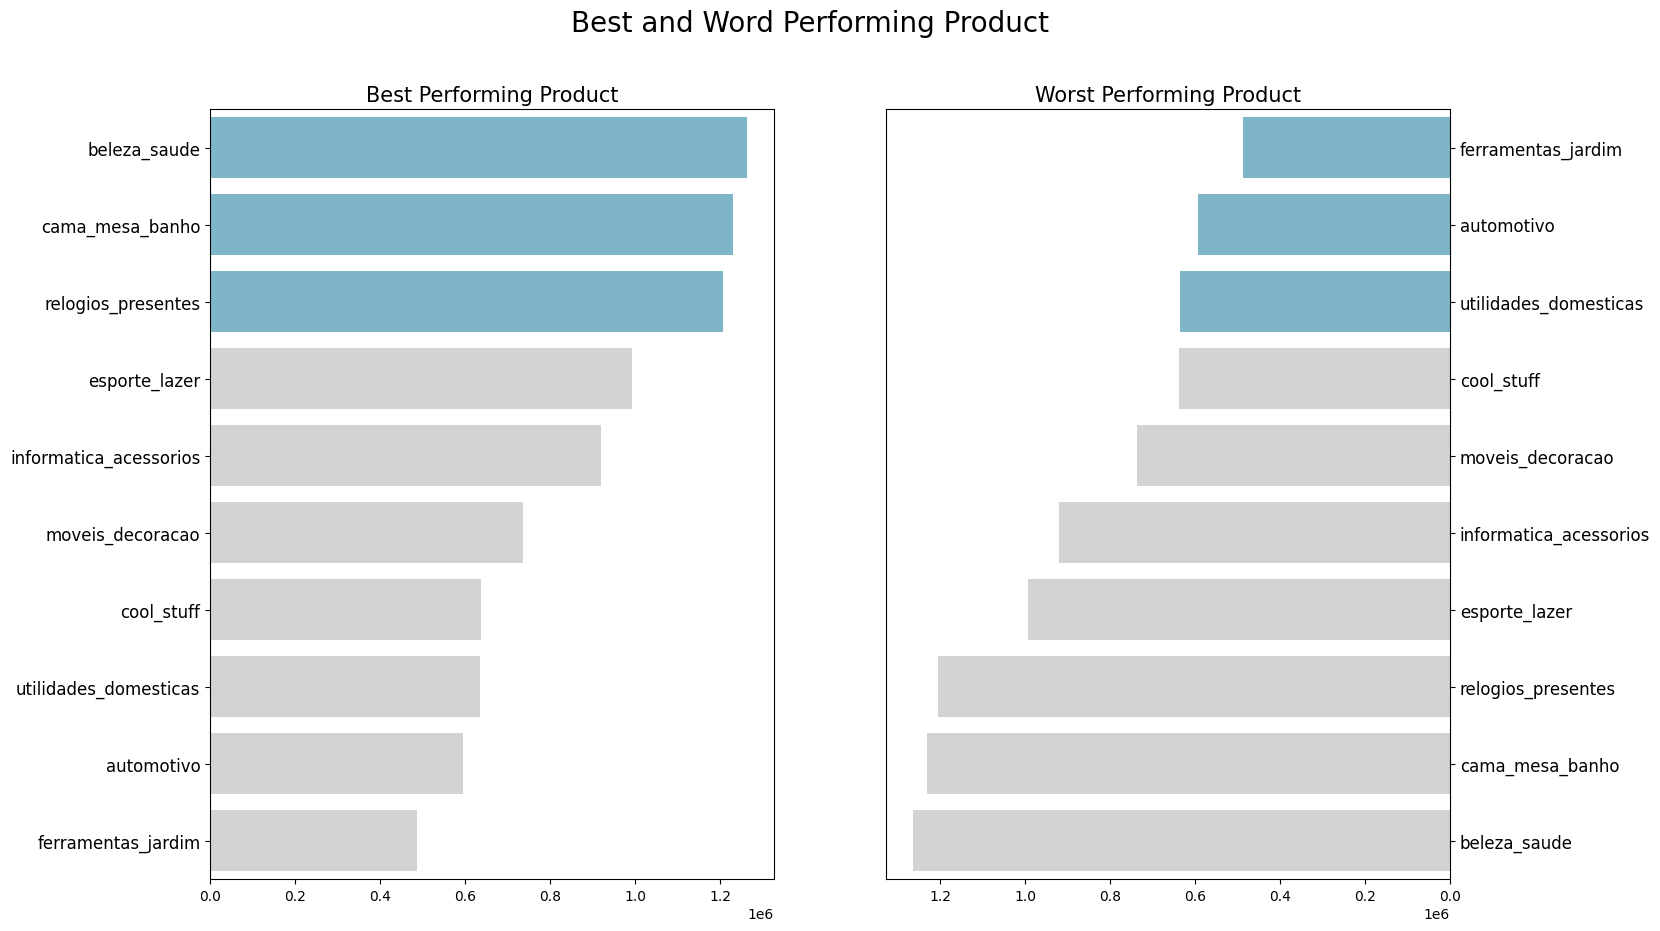

In [129]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='price', y='product_category_name', data=sales_by_category.head(10), orient='h', palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x='price', y='product_category_name', data=sales_by_category.sort_values(by='price', ascending=True).head(10), orient='h', palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title('Worst Performing Product', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Best and Word Performing Product', fontsize=20)
plt.show()

- Top 3 Best Performing Product yaitu Belaze saude, cama mesa banho, dan relogios presentes
- Top 3 Worst Performing Product yaitu ferramentas jardim, automotivo, dan utilidades dommesticas

In [130]:
# jumlah order per bulan
all_data['month'] = all_data['order_purchase_timestamp'].dt.to_period('M')
sales_by_month = all_data.groupby('month')['order_id'].count().reset_index()
sales_by_month

,month,order_id
0,2016-09,6
1,2016-10,367
2,2016-12,1
3,2017-01,966
4,2017-02,1962
5,2017-03,3020
6,2017-04,2693
7,2017-05,4182
8,2017-06,3619
9,2017-07,4565


Insight:

- Jumlah order mengalami peningkatan signifikan dari tahun 2016 ke 2017. Pada awal tahun 2017, order masih di bawah 1000 pesanan per bulan, tetapi sejak Februari 2017 (1,962 pesanan) terjadi peningkatan stabil hingga akhir tahun.
- November 2017 mencatat jumlah order tertinggi, yaitu 8,729 pesanan. Lonjakan ini kemungkinan besar terkait dengan event belanja besar seperti Black Friday atau diskon akhir tahun yang mendorong lebih banyak transaksi.
- Order stabil di kisaran 7,000 - 8,000 pesanan per bulan dari Januari hingga Agustus 2018.
- Juni 2018 mengalami sedikit penurunan menjadi 7,084 pesanan. Ini mungkin disebabkan oleh periode liburan atau faktor musiman.


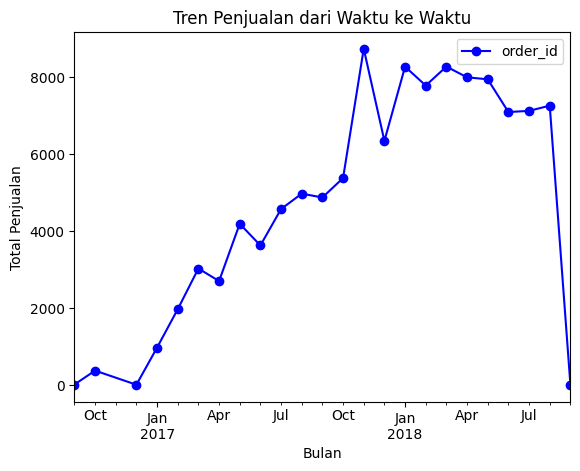

In [131]:
# Visualisasi tren penjualan
sales_by_month.plot(kind='line', x='month', y='order_id', title='Tren Penjualan dari Waktu ke Waktu', marker='o', color='b')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.show()

**Insight:**
- Penjualan tiap tahun semakin menaik dimulai dari januari 2017 dan puncaknya pada rentang november-desember 2017.
- Penjualan kembali menurun pada january 2018 dan naik kembali pada februari 2018.

### Pertanyaan 3: Bagaimana Kepuasan Pelanggan Terkait dengan Waktu Pengiriman?

In [132]:
# Rata-rata keterlambatan pengiriman 
all_data["actual_delivery_time"] = (all_data["order_delivered_customer_date"] - all_data["order_estimated_delivery_date"]).dt.days
late_deliver = all_data.groupby("customer_city")["actual_delivery_time"].mean().round(2).reset_index(name="avg_delay_days").head()
late_deliver

,customer_city,avg_delay_days
0,abadia dos dourados,-17.00
1,abadiania,-16.00
2,abaete,-13.58
3,abaetetuba,-11.00
4,abaiara,2.50


Insight:

- Data menunjukkan bahwa di beberapa kota, seperti Abadia dos Dourados (-17 hari), Abadiânia (-16 hari), dan Abaeté (-13.58 hari), pengiriman tiba lebih awal dari perkiraan.
- Abaiara mengalami keterlambatan rata-rata 2.5 hari.
- Optimalkan Estimasi Waktu Pengiriman: Jika mayoritas pengiriman lebih cepat dari estimasi, sistem estimasi bisa disesuaikan agar lebih akurat, menghindari kesenjangan ekspektasi pelanggan.
- Fokus pada Kota dengan Keterlambatan: Kota seperti Abaiara yang mengalami keterlambatan perlu diteliti lebih lanjut untuk menemukan penyebabnya (misalnya masalah logistik atau infrastruktur).

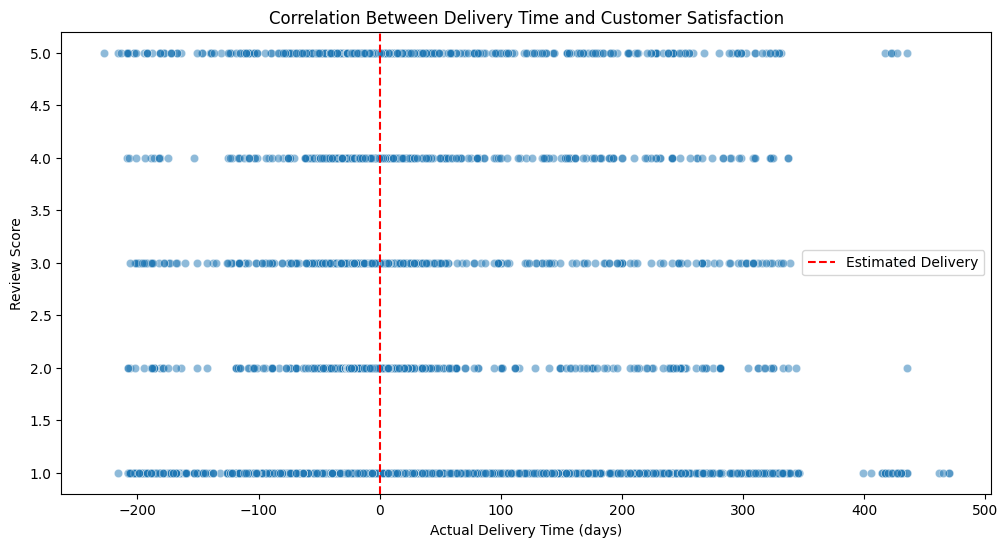

In [133]:
# Scatter plot antara waktu pengiriman dan review score
plt.figure(figsize=(12,6))
sns.scatterplot(x='actual_delivery_time', y='review_score', data=all_data, alpha=0.5)
plt.axvline(0, color='r', linestyle='--', label='Estimated Delivery')
plt.xlabel('Actual Delivery Time (days)')
plt.ylabel('Review Score')
plt.title('Correlation Between Delivery Time and Customer Satisfaction')
plt.legend()
plt.show()

1.  Interpretasi Sumbu X (Actual Delivery Time)
    - Sumbu X menunjukkan perbedaan antara tanggal pengiriman aktual dan estimasi pengiriman (dalam hari).
    - Nilai negatif berarti pesanan tiba lebih cepat dari perkiraan dan Nilai positif berarti pesanan terlambat dari estimasi.
    - Garis merah putus-putus pada X = 0 menunjukkan batas antara pengiriman lebih awal dan keterlambatan.
2. Interpretasi Sumbu Y (Review Score)
    - Sumbu Y menunjukkan skor ulasan pelanggan (1-5).
    - Skor 5 berarti pelanggan sangat puas, sementara 1 berarti pelanggan sangat tidak puas.
3. Pola dan Temuan Utama
    - Banyak titik data dengan skor 4 dan 5 berada di sekitar atau di sebelah kiri garis merah (pengiriman lebih cepat), menunjukkan bahwa pengiriman yang lebih cepat berkontribusi pada kepuasan pelanggan.
    - Semakin jauh ke kanan (semakin terlambat), semakin banyak titik dengan skor 1 atau 2, menunjukkan bahwa pelanggan yang mengalami keterlambatan panjang sering memberikan review buruk.
    - Beberapa titik dengan skor 1 dan 2 berada di sisi kiri garis merah. Ini menunjukkan bahwa faktor lain selain keterlambatan, seperti kualitas produk atau layanan pelanggan, juga mempengaruhi review

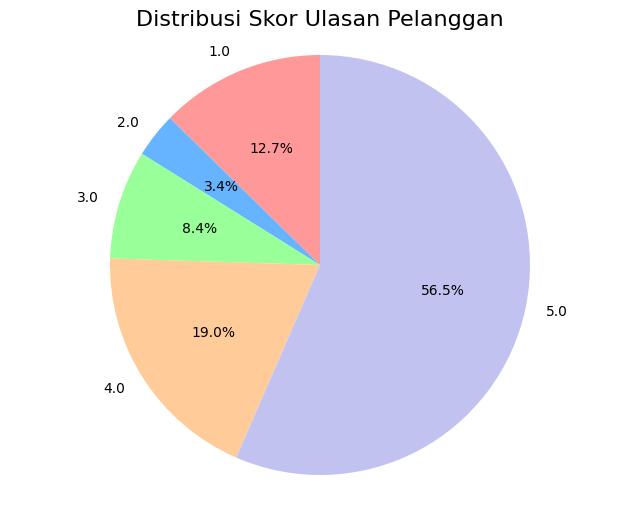

In [134]:
# Hitung frekuensi skor ulasan
review_score_counts = all_data['review_score'].value_counts().sort_index()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(review_score_counts, labels=review_score_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Distribusi Skor Ulasan Pelanggan', fontsize=16)
plt.axis('equal')  # Agar pie chart berbentuk lingkaran sempurna

# Tampilkan plot
plt.show()

- Mayoritas pelanggan memberikan rating 5 dengan persetase 56.5% dan rating 4 19%. menunjukkan bahwa pelanggan puas dengan product dan pelayanannya

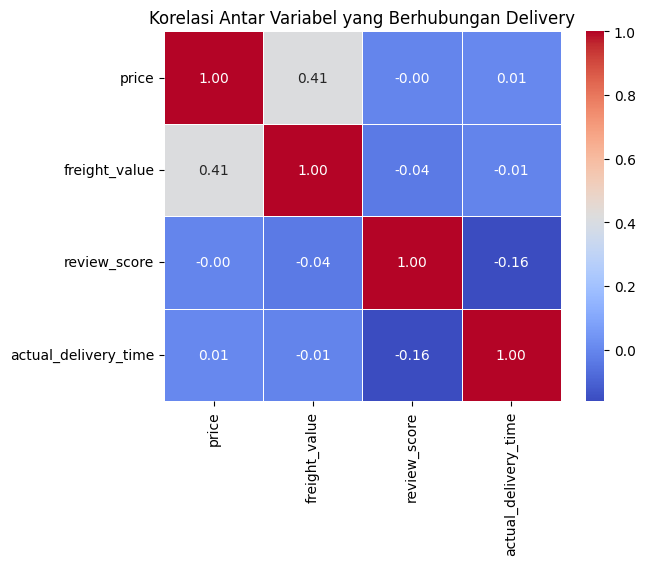

In [135]:
# Heatmap: Korelasi Antar Variabel
correlation_matrix = all_data[['price', 'freight_value', 'review_score', 'actual_delivery_time']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Variabel yang Berhubungan Delivery')
plt.show()

1.  Hubungan antara actual_delivery_time dan review_score (-0.16, korelasi negatif lemah)
    - Semakin lama keterlambatan pengiriman (actual_delivery_time meningkat), skor ulasan (review_score) cenderung menurun.
    - Meskipun korelasi tidak terlalu kuat, ada indikasi bahwa keterlambatan pengiriman berdampak negatif pada kepuasan pelanggan.
2. Hubungan antara price dan freight_value (0.41, korelasi positif sedang)
    - Semakin tinggi harga produk, semakin tinggi biaya pengiriman (freight_value).
    - Ini logis karena produk mahal biasanya memiliki ukuran lebih besar atau membutuhkan layanan pengiriman yang lebih baik.

3. Hubungan antara freight_value dan review_score (-0.04, korelasi sangat lemah)
    - Biaya pengiriman hampir tidak berpengaruh terhadap skor ulasan pelanggan.
    - Pelanggan mungkin lebih peduli pada ketepatan waktu pengiriman dibandingkan biaya pengirimannya.
4. Hubungan antara price dan review_score (-0.00, korelasi sangat lemah)
    - Harga produk tidak berpengaruh signifikan terhadap kepuasan pelanggan.
    - Faktor lain seperti kualitas produk dan layanan pelanggan mungkin lebih menentukan dalam ulasan pelanggan.


### RFM Analysis

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [136]:
pd.set_option('display.max_columns', 50)
all_data.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,seller_id,shipping_limit_date,price,freight_value,delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time,month,actual_delivery_time
84407,f0d56cf2f87cd186e3c1931a6b4189c4,483b26e1bf0f4797e5512d8849d90835,8579,itaquaquecetuba,SP,4520766ec412348b8d4caa5e8a18c464,automotivo,59.0,956.0,1.0,50.0,16.0,16.0,17.0,bd1e185a530c014794c02ee3d2d61a68,delivered,2017-04-08 08:46:10,2017-04-08 09:02:20,2017-04-12 16:24:59,2017-04-18 08:47:38,2017-05-02,1.0,16090f2ca825584b5a147ab24aa30c86,2017-04-13 09:02:20,59.99,11.03,1.0,53c127c5d1c915796456055246d0793f,5.0,Recomendo,Muito bom!!!,2017-04-19,2017-04-19 23:55:25,0.0,2017-04,-14.0
99925,44f7c335ef13543f17246fb1010edecd,c9efaa3ef7bb1b4071f4d08b41c25832,1420,sao paulo,SP,e482ad963bfb9a9abc51b9850aca97b7,utilidades_domesticas,45.0,293.0,1.0,250.0,19.0,8.0,11.0,fa48ce5f6c4499293eecc423fde54476,delivered,2017-12-08 14:17:43,2017-12-08 14:34:01,2017-12-11 15:42:14,2017-12-12 20:42:34,2017-12-27,1.0,c2d70ce2c5d0a2eb75e78668236e6dc8,2017-12-14 14:31:09,49.00,7.78,0.0,744e71063a655fb0ef75104f1a7abdc5,5.0,Recomendo,Muito bom,2017-12-13,2017-12-13 23:21:17,0.0,2017-12,-15.0
70780,2579e4414593b70a9859c330657e6120,2bab912151acdc1fcd1d68811f63963e,66615,belem,PA,1dd85d42702d499bdccd33e6e3227a61,cama_mesa_banho,44.0,122.0,1.0,1200.0,45.0,10.0,15.0,d368ca1b5f6b46bdaf14b7c0cb5e40a1,delivered,2017-08-20 19:32:32,2017-08-21 19:35:35,2017-08-25 19:47:42,2017-09-02 15:29:02,2017-09-21,1.0,e38db885400cd35c71dfd162f2c1dbcf,2017-08-25 19:35:35,54.90,24.93,6.0,d7628ab408ebb5d9d67a122be5ee3f6b,5.0,Recomendo,Muito bom,2017-09-03,2017-09-03 22:28:35,0.0,2017-08,-19.0
36954,cca8e8cf66f7fb6cd5c7a6ca5e0f9149,cbab12efd62b66bbcdd86ca64a6b25e7,13920,pedreira,SP,78efe838c04bbc568be034082200ac20,moveis_decoracao,57.0,272.0,1.0,2500.0,40.0,10.0,30.0,d2f6de2ff8b1a8a061b5e9af878ca86d,delivered,2018-01-31 13:16:54,2018-01-31 14:03:09,2018-02-01 19:28:02,2018-02-10 04:28:34,2018-03-01,1.0,0241d4d5d36f10f80c644447315af0bd,2018-02-06 14:03:09,99.90,20.19,2.0,c0c6b2bcaafa49aca9380664346dee49,5.0,Recomendo,Muito bom,2018-02-10,2018-02-12 21:15:12,2.0,2018-01,-19.0
10734,76ff993eda8abab1781028a0ac19ed0a,1c31e9e0651dcb9bb941ff68c87365ee,3733,sao paulo,SP,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,59.0,341.0,2.0,1750.0,37.0,22.0,40.0,58a9eee77c75781ec6c4f725891c7747,delivered,2017-11-05 20:11:40,2017-11-05 20:26:45,2017-11-08 21:32:07,2017-11-13 18:54:39,2017-11-24,3.0,1f50f920176fa81dab994f9023523100,2017-11-09 20:26:45,59.90,13.44,1.0,3c5dc2002c418b5c1919ccd7b18ce75a,4.0,Recomendo,Apesar de terem sido \r\nentregues separados \...,2017-11-14,2017-11-14 22:51:44,0.0,2017-11,-11.0


In [137]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114089 entries, 0 to 114088
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    114089 non-null  object        
 1   customer_unique_id             114089 non-null  object        
 2   customer_zip_code_prefix       114089 non-null  int64         
 3   customer_city                  114089 non-null  object        
 4   customer_state                 114089 non-null  object        
 5   product_id                     113314 non-null  object        
 6   product_category_name          113314 non-null  object        
 7   product_name_lenght            113314 non-null  float64       
 8   product_description_lenght     113314 non-null  float64       
 9   product_photos_qty             113314 non-null  float64       
 10  product_weight_g               113314 non-null  float64       
 11  

In [138]:
# mengambil transaksi yang sudah selesai
data_rfm = all_data[all_data['order_status'] == 'delivered']

rfm_df = data_rfm.groupby(by='customer_unique_id', as_index=False).agg({
    'order_purchase_timestamp': 'max', # Recency
    'order_id': 'count', # Frequency
    'price': 'sum', # Monetary
})

# Ubah nama kolom agar lebih mudah dipahami
rfm_df.columns = ['customer_id', "max_order", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df['max_order'] = rfm_df['max_order'].dt.date
recent_date = all_data['order_purchase_timestamp'].dropna().dt.date.max()
rfm_df['recency'] = rfm_df['max_order'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order', axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,119
2,0000f46a3911fa3c0805444483337064,1,69.00,542
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,326
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,293


- Mayoritas pelanggan hanya melakukan satu kali transaksi (Frequency = 1). 
- Beberapa pelanggan memiliki Recency yang cukup tinggi (misalnya 542 hari), menunjukkan bahwa mereka sudah tidak aktif.
- Pelanggan dengan Monetary tinggi harus diperlakukan sebagai pelanggan potensial.

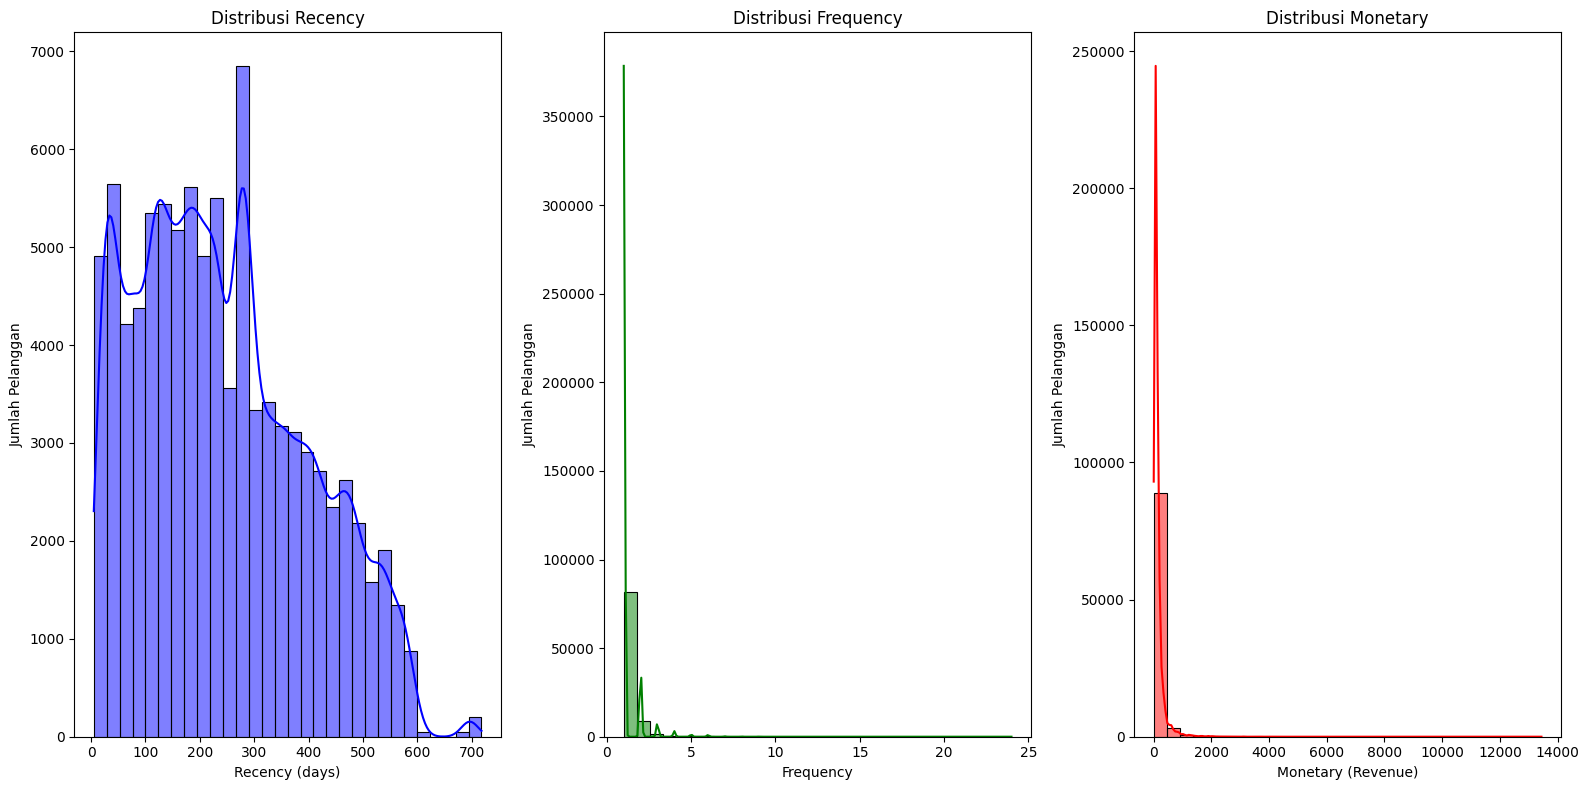

In [139]:
# 1. Histogram Distribusi RFM
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

# Recency
sns.histplot(rfm_df['recency'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribusi Recency')
axes[0].set_xlabel('Recency (days)')
axes[0].set_ylabel('Jumlah Pelanggan')

# Frequency
sns.histplot(rfm_df['frequency'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribusi Frequency')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Jumlah Pelanggan')

# Monetary
sns.histplot(rfm_df['monetary'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribusi Monetary')
axes[2].set_xlabel('Monetary (Revenue)')
axes[2].set_ylabel('Jumlah Pelanggan')

plt.tight_layout()
plt.show()

- Sebagian besar pelanggan memiliki recency antara 100–300 hari, artinya masih cukup aktif, tetapi ada sebagian yang berisiko churn.
- Mayoritas pelanggan hanya melakukan satu kali pembelian (frequency = 1), menandakan rendahnya loyalitas.
- Distribusi Monetary menunjukkan bahwa mayoritas pelanggan berkontribusi pada transaksi kecil, dengan beberapa pelanggan yang berkontribusi besar.

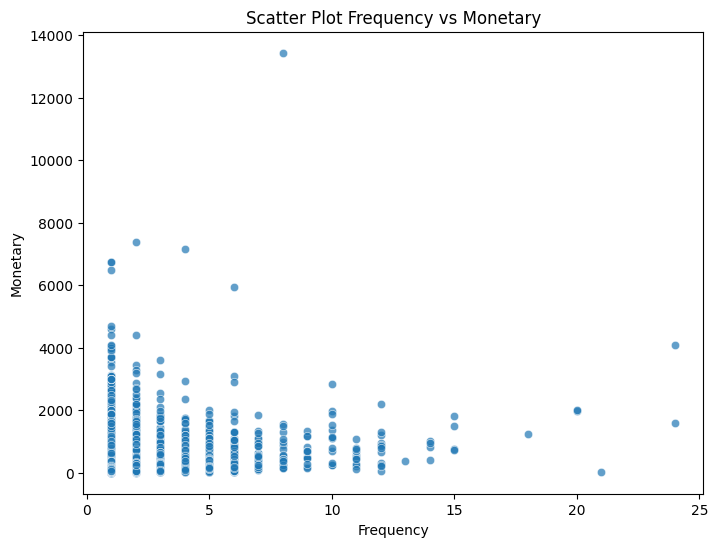

In [140]:
# 2. Scatter Plot antara Frequency vs Monetary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_df['frequency'], y=rfm_df['monetary'], alpha=0.7)
plt.title('Scatter Plot Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

- Sebagian besar pelanggan memiliki frequency yang rendah (1-5 kali transaksi). Mayoritas pelanggan hanya bertransaksi sekali atau beberapa kali (Frequency rendah)
- Ada beberapa pelanggan dengan Frequency di atas 10 dan Monetary di atas 6000–14000.
- Pelanggan dengan Frequency tinggi tidak selalu memiliki Monetary tinggi

**RFM Conculision Analyst:**

- Mayoritas pelanggan hanya bertransaksi satu kali, menunjukkan bahwa tingkat loyalitas pelanggan masih rendah.
- Sebagian besar pelanggan memiliki monetary yang rendah, tetapi ada kelompok kecil pelanggan dengan monetary tinggi yang berkontribusi besar terhadap pendapatan.
- Banyak pelanggan memiliki recency tinggi (tidak bertransaksi dalam waktu lama), yang berarti ada risiko pelanggan churn (berhenti berbelanja).

## Conclusion

1.  **Bagaimana Perilaku Pembelian Pelanggan Berdasarkan Lokasi Geografis?**
    - **Kota besar seperti Rio de Janeiro dan São Paulo memiliki total pendapatan tertinggi**, menunjukkan bahwa urbanisasi dan daya beli masyarakat sangat mempengaruhi aktivitas e-commerce.
    - **Wilayah utara dan tengah Brasil memiliki volume transaksi lebih rendah**, yang menunjukkan potensi ekspansi dengan perbaikan infrastruktur logistik dan strategi pemasaran yang lebih baik.
2. **Produk Apa yang Paling Laris dan Bagaimana Tren Penjualannya dari Waktu ke Waktu?**
    - **Produk dalam kategori Kecantikan & Kesehatan serta Perlengkapan Rumah Tangga paling laris**, sementara kategori Peralatan Taman dan Otomotif memiliki penjualan terendah.
    - Penjualan mengalami lonjakan signifikan pada **Black Friday dan akhir tahun 2017**, menunjukkan bahwa musim diskon berpengaruh besar terhadap peningkatan transaksi.
3. **Bagaimana Kepuasan Pelanggan Terkait dengan Waktu Pengiriman?**
    - **Keterlambatan pengiriman berdampak negatif terhadap kepuasan pelanggan**, meskipun korelasinya lemah, menunjukkan bahwa ketepatan waktu pengiriman tetap penting bagi pelanggan.
    - **Mayoritas pelanggan memberikan rating 4 dan 5**, yang menunjukkan bahwa secara keseluruhan mereka puas dengan produk dan layanan, tetapi estimasi pengiriman perlu dioptimalkan agar lebih akurat.

Rekomendasi Bisnis
- Fokus ekspansi ke wilayah dengan potensi pertumbuhan tinggi seperti wilayah utara dan tengah Brasil dengan peningkatan infrastruktur logistik.
- Menyediakan stok lebih banyak dan memperkuat promosi untuk kategori produk yang paling laris seperti Kecantikan & Kesehatan serta Perlengkapan Rumah Tangga.
- Memperbaiki estimasi waktu pengiriman agar lebih akurat serta meningkatkan efisiensi logistik untuk mengurangi keterlambatan.
- Mengoptimalkan strategi pemasaran menjelang musim belanja besar (Black Friday, akhir tahun) untuk meningkatkan volume penjualan.